<a href="https://colab.research.google.com/github/Monishavs/Prodigy_ML_02/blob/main/Retail_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

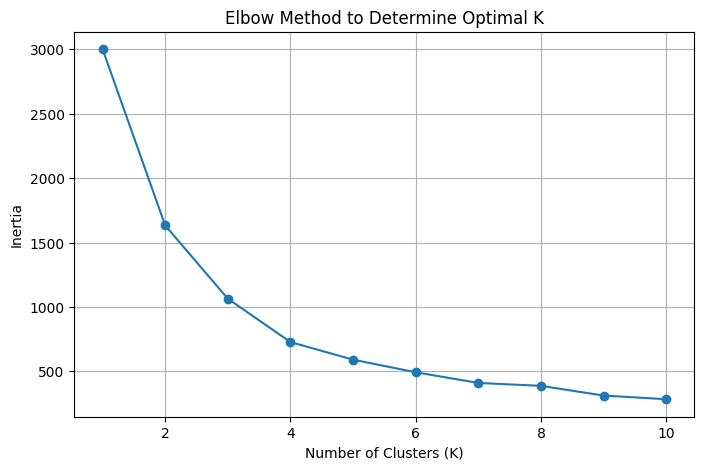

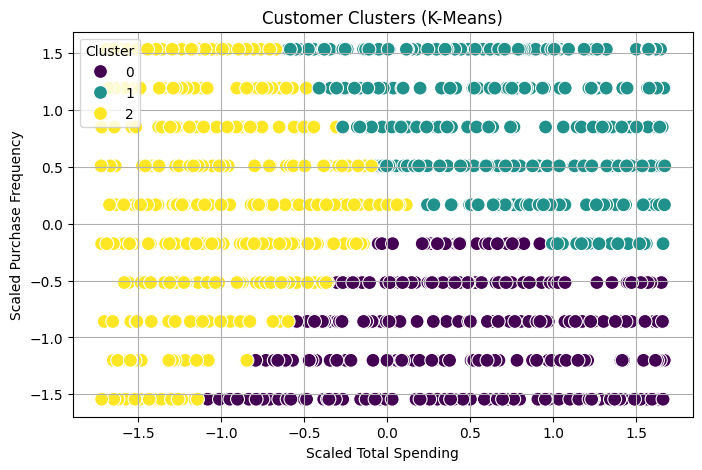

      Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle       46.33         7  16.2155  

In [11]:
# Step 1: Load or create a sample dataset
# For demonstration, let's create a sample dataset
data=pd.read_csv('/content/supermarket_sales - Sheet1.csv')
df = pd.DataFrame(data)

# Step 2: Preprocess the data
features = df[['Unit price', 'Quantity', 'Total']]

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 3: Determine the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method to Determine Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Step 4: Apply K-means with the chosen number of clusters
optimal_k = 3  # Based on Elbow Method (this can vary)
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Step 5: Visualize the clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=scaled_features[:, 0], y=scaled_features[:, 1],
    hue=df['Cluster'], palette='viridis', s=100
)
plt.title('Customer Clusters (K-Means)')
plt.xlabel('Scaled Total Spending')
plt.ylabel('Scaled Purchase Frequency')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Display the clustered data
print(df)